In [1]:
# Fertilizer Recommendation System

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
fert = pd.read_csv('Fertilizer Prediction.csv')
fert

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [3]:
fert.shape

(99, 9)

In [4]:
fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [5]:
fert.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [6]:
fert.duplicated().sum()

np.int64(0)

In [7]:
fert.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [8]:
fert_cols = fert.select_dtypes(include=np.number)
fert_cols

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,26,52,38,37,0,0
1,29,52,45,12,0,36
2,34,65,62,7,9,30
3,32,62,34,22,0,20
4,28,54,46,35,0,0
...,...,...,...,...,...,...
94,25,50,32,24,0,19
95,30,60,27,4,17,17
96,38,72,51,39,0,0
97,36,60,43,15,0,41


In [9]:
fert_co = fert_cols.corr()
fert_co

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


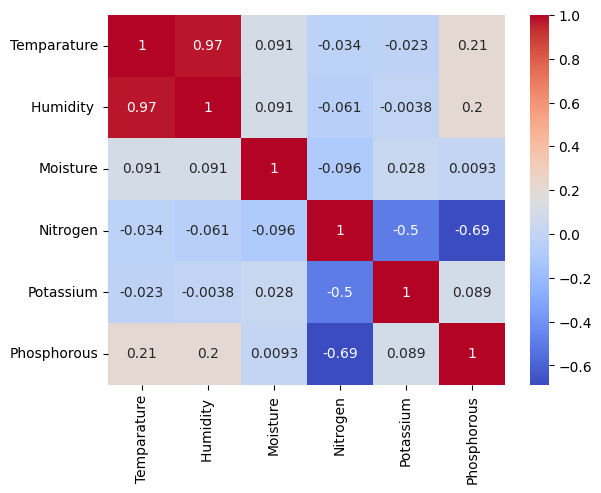

In [10]:
sns.heatmap(fert_co , annot=True , cmap='coolwarm')
plt.show()

In [11]:
fert['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

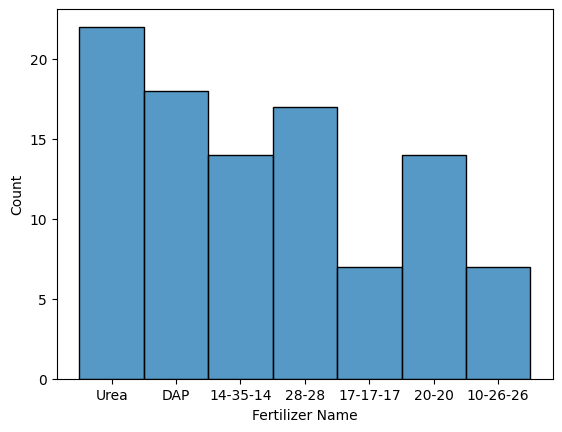

In [12]:
sns.histplot(fert['Fertilizer Name'])
plt.show()

In [13]:
fert_features = fert.select_dtypes(include=np.number).columns.to_list()
fert_features

['Temparature',
 'Humidity ',
 'Moisture',
 'Nitrogen',
 'Potassium',
 'Phosphorous']

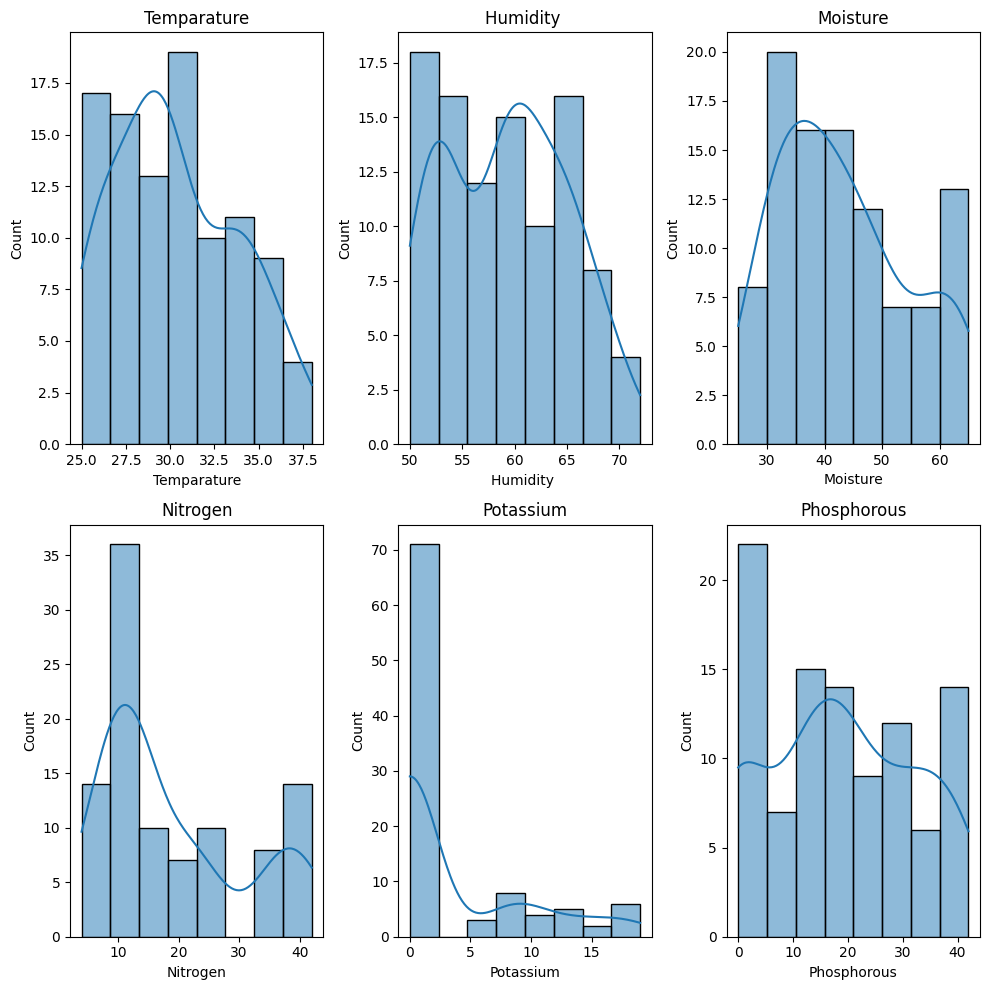

In [14]:
fig,ax = plt.subplots(2, 3, figsize=(10, 10))
for i, subplot in zip(fert_features, ax.flatten()):
    sns.histplot(fert[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

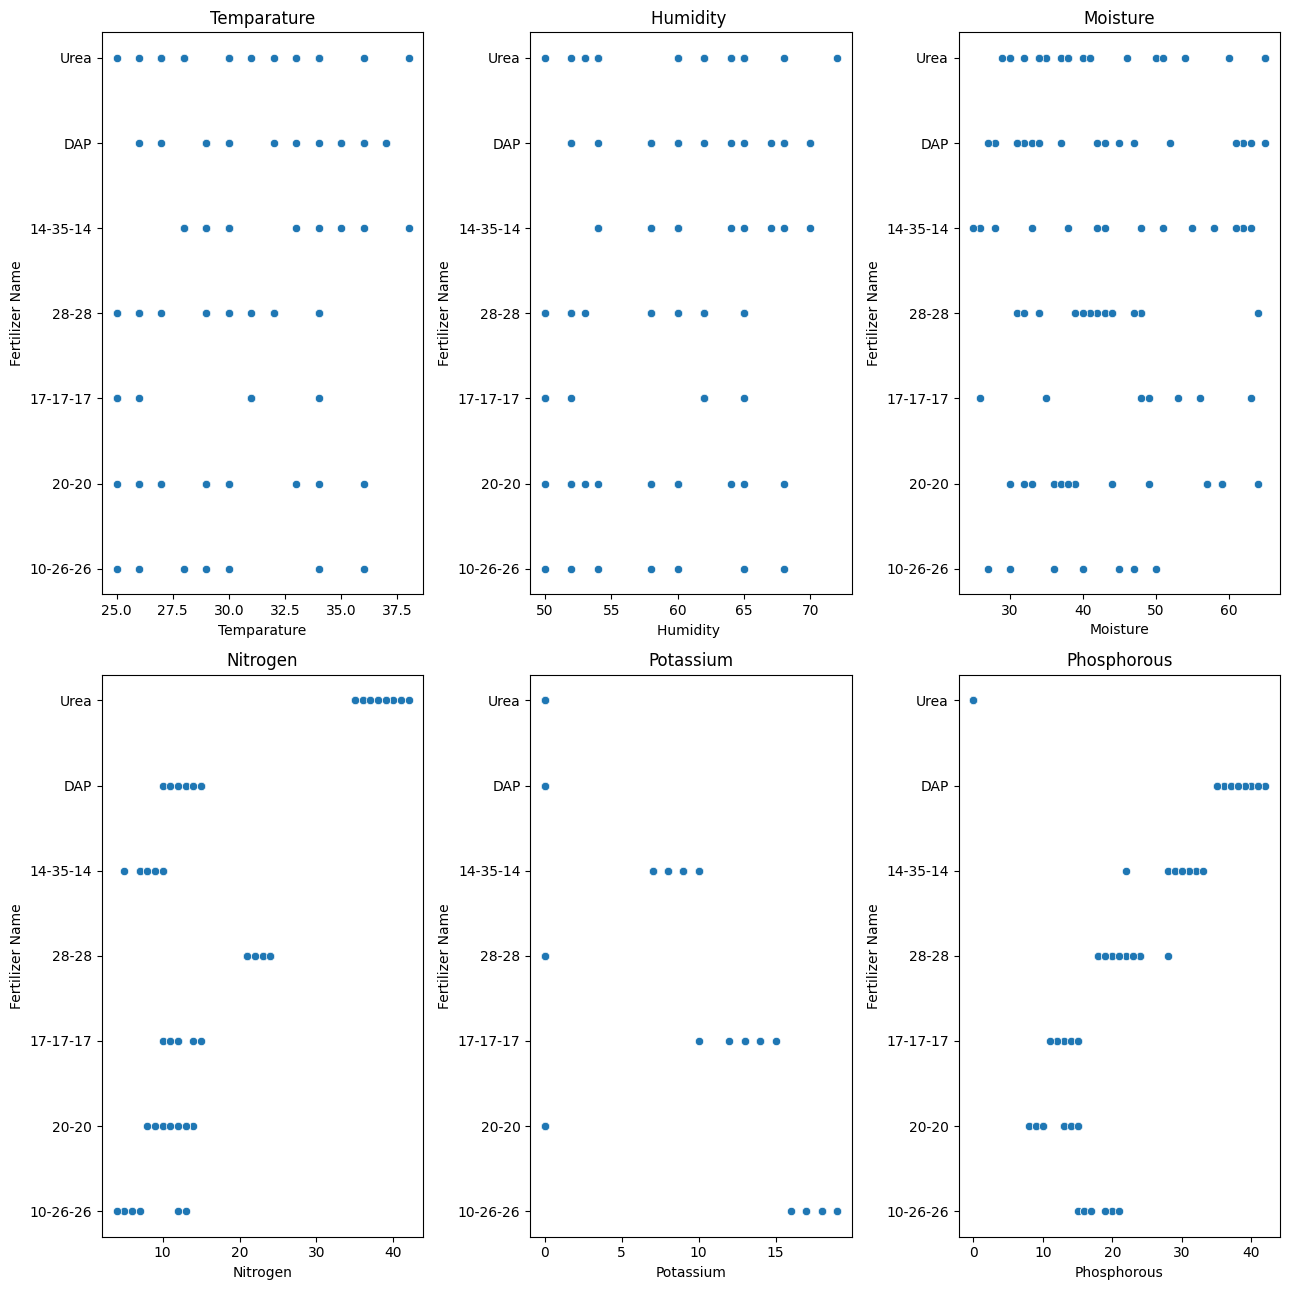

In [15]:
fig,ax = plt.subplots(2, 3, figsize=(13, 13))
for i, subplot in zip(fert_features, ax.flatten()):
    sns.scatterplot(data=fert, x=i, y='Fertilizer Name', ax=subplot)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

In [16]:
fert['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [17]:
fert_dict = {
    'Urea' : 1,
     'DAP' : 2 ,
     '14-35-14' : 3,
     '28-28' : 4,
     '17-17-17' : 5,
     '20-20' : 6,
     '10-26-26' : 7
}

In [18]:
fert['fert_no'] = fert['Fertilizer Name'].map(fert_dict)
fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,fert_no
0,26,52,38,Sandy,Maize,37,0,0,Urea,1
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,2
2,34,65,62,Black,Cotton,7,9,30,14-35-14,3
3,32,62,34,Red,Tobacco,22,0,20,28-28,4
4,28,54,46,Clayey,Paddy,35,0,0,Urea,1


In [19]:
fert['fert_no'].value_counts()

fert_no
1    22
2    18
4    17
3    14
6    14
5     7
7     7
Name: count, dtype: int64

In [20]:
fert.drop('Fertilizer Name' , axis=1 , inplace=True)
fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,3
3,32,62,34,Red,Tobacco,22,0,20,4
4,28,54,46,Clayey,Paddy,35,0,0,1


In [21]:
# Select the object columns
fert.select_dtypes(include=['object']).columns


Index(['Soil Type', 'Crop Type'], dtype='object')

In [22]:
# convert the categorical columns to numerical columns using labelencoder

lb = LabelEncoder()
fert['Crop Type'] = lb.fit_transform(fert['Crop Type'])
fert['Soil Type'] = lb.fit_transform(fert['Soil Type'])
fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,4,3,37,0,0,1
1,29,52,45,2,8,12,0,36,2
2,34,65,62,0,1,7,9,30,3
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,1


In [23]:
# split the dataset into features and target

x = fert.drop('fert_no' , axis=1)
y = fert['fert_no']
print(f"The shape of features is: {x.shape}")
print(f"The shape of target is: {y.shape}")

The shape of features is: (99, 8)
The shape of target is: (99,)


In [24]:
# split the dataset into training and testing sets

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=50)
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_test is: {x_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (79, 8)
The shape of x_test is: (20, 8)
The shape of y_train is: (79,)
The shape of y_test is: (20,)


In [25]:
# Scale the features using StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
# insialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

In [27]:
# train the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
# evaluate the model on the test set and print the accuracy
fert_accuracy = model.score(x_test, y_test)
print(f"The accuracy of the model is: {fert_accuracy*100}%")

The accuracy of the model is: 100.0%


In [29]:
# evaluate the model on the training set and print the accuracy
accuracy = model.score(x_train, y_train)
print(f"The accuracy of the model on the training set is: {accuracy*100:}%")

The accuracy of the model on the training set is: 100.0%


In [30]:
def fert_prediction(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
  features = np.array([[Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
  transformed_features = sc.transform(features)
  prediction = model.predict(transformed_features).reshape(1,-1)
  fert_dict = {
    'Urea' : 1,
     'DAP' : 2 ,
     '14-35-14' : 3,
     '28-28' : 4,
     '17-17-17' : 5,
     '20-20' : 6,
     '10-26-26' : 7
  }
  fertilizier = [list(fert_dict.keys())[list(fert_dict.values()).index(int(i))] for i in prediction[0]]
  return fertilizier


In [31]:

Temparature = 36
Humidity = 14
Moisture = 13
Soil_Type = 8
Crop_Type = 9
Nitrogen = 10
Potassium = 111
Phosphorous = 297

fert_prediction(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous)

d:\Education\Coding\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


['DAP']

In [32]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)